#### 📊 Análisis por Índice de Fraude

El **índice de fraude (IF)** es un indicador que se ha creado para poder medir la proporción de transacciones fraudulentas respecto al total procesado en un el objetivo de analisis, que puede ser por comercio origen, mcc, pais de origen, etc.:

$$
IF = \frac{TF}{TT}
$$

donde **TF** es el **número de transacciones confirmadas como fraude** y **TT** el **total de transacciones.**

---

### Importancia crítica del IF = 1

Un índice de fraude igual a 1 indica que **todas las transacciones de ese comercio fueron fraudulentas**, lo que implica una situación de riesgo máximo que merece atención inmediata. Este escenario puede reflejar:

- Comercios totalmente comprometidos, utilizados exclusivamente para fraudes y validaciones masivas (BIN/IIN Attacks).
- Riesgo sistémico para la red, ya que estos actores degradan la calidad del ecosistema y facilitan el movimiento de fondos ilícitos.

Ante esta evidencia, la adopción de **reglas de declinación automática en tiempo real, bloqueos inmediatos y alertas prioritarias** es indispensable para mitigar pérdidas y proteger a clientes y entidades financieras.

---

### Se propone el siquiente uso estratégico del índice IF para gestión de riesgo.

| Rango de IF           | Interpretación                              | Estrategia Recomendable                         |
|-----------------------|---------------------------------------------|------------------------------------------------|
| IF = 1.0              | Comercio 100% fraudulento                   | Bloqueo y declinación inmediata; alerta roja  |
| IF > 0.7              | Alto riesgo (<100%)                         | Evaluación exhaustiva, reglas reforzadas       |
| 0.3 < IF ≤ 0.7        | Riesgo moderado                            | Monitoreo continuo, ajustes preventivos        |
| IF ≤ 0.3              | Bajo riesgo relativo; pero con volumen     | Análisis complementario basado en volumen      |

---

# 1 Configuración del ambiente

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
from IPython.display import display
from typing import List, Tuple, Union, Optional
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import networkx as nx
from pandas.api.types import is_period_dtype
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
import os

pd.set_option ('display.max_columns', None)
pd.set_option ('display.max_rows', None)

# 2 Carga de datos limpios

In [58]:
# Cargar los datos del dataset procesados de 01_carga_limpieza
df = pd.read_parquet(r'C:\Users\xavie\Documents\PROYECTOS\fraud-detection-ml\data\processed\01_df_limpieza.parquet')
print("Dataset cargado correctamente")
print(f"Forma del dataset: {df.shape}")

Dataset cargado correctamente
Forma del dataset: (1463837, 39)


In [59]:
df_patrones = df.copy()
df_patrones_fraudes = df_patrones[df_patrones['Fraude']== 1].copy()
df_patrones_fraudes_cnp = df_patrones_fraudes[df_patrones_fraudes['canal'] == 'CNP'].copy()

df_patrones_fraudes['mes_year'] = df_patrones_fraudes['mes_year'].astype(str)
df_patrones_fraudes['year'] = df_patrones_fraudes['year'].astype(str)
df_patrones_fraudes['mes_year'] = df_patrones_fraudes['mes_year'].astype(str)
df_patrones_fraudes['trimestre'] = df_patrones_fraudes['trimestre'].astype(str)

In [ ]:
# Filtrar datos a analizar

def filtrar_df (df, year_field, years):
    if isinstance(years, list):
        return df[df[year_field].isin(years)]
    return df[df[year_field] == years]

tiempo_analizar = ['2023','2024','2025']
columna_filtro = 'year'

df_patrones_fraudes_f = filtrar_df(df_patrones_fraudes, columna_filtro, tiempo_analizar)


# def filtrar_df (df, year_field, years):
#     if isinstance(years, list):
#         return df[df[year_field].isin(years)]
#     return df[df[year_field] == years]

# tiempo_analizar = ['2023','2024','2025']
# columna_filtro = 'year'

# df_patrones = filtrar_df(df_pat, columna_filtro, tiempo_analizar)



In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1463837 entries, 0 to 1463839
Data columns (total 39 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   DE32_Cod_Adquiriente  1463837 non-null  object        
 1   DE42_Cod_Comercio     1463837 non-null  object        
 2   DE49_Cod_Moneda       1463837 non-null  object        
 3   DE61_13_Cod_Pais      1463837 non-null  object        
 4   ID_Usuario            1463837 non-null  object        
 5   DE13_Fecha            1463837 non-null  datetime64[ns]
 6   Id_Trx                1463837 non-null  object        
 7   Comercio_Alias        1463837 non-null  object        
 8   DE18_MCC              1463837 non-null  object        
 9   DE6_Monto_Dolar       1463837 non-null  float64       
 10  DE4_Monto_Local       1463837 non-null  float64       
 11  DE22_Modo_Entrada     1463837 non-null  object        
 12  Aut                   1463837 non-null  object 


## ANÁLISIS POR NOMBRE DE COMERCIO

,Rango IF_TOTAL (Comercio_Alias),Cantidad
0,IGUAL 0,39043
1,0.01-0.25,329
2,0.25-0.50,124
3,0.50-0.75,113
4,0.75-0.99,32
5,IGUAL 1,519


✅ Archivo exportado como 'C:\Users\xavie\Documents\PROYECTOS\fraud-detection-ml\data\indice_fraude\indice_fraude_Comercio_Alias.xlsx'


C:\Users\xavie\AppData\Local\Temp\ipykernel_22352\2054252151.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(etiquetas, rotation=75, ha="right")


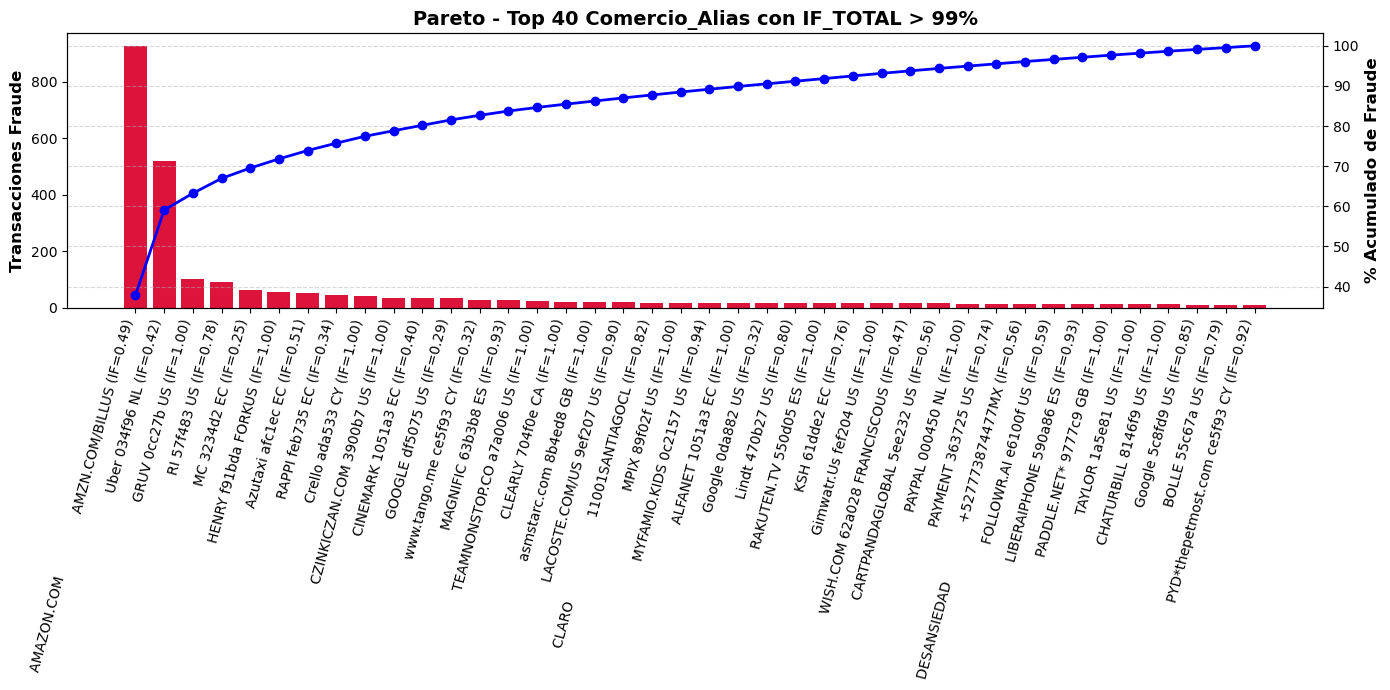

C:\Users\xavie\AppData\Local\Temp\ipykernel_22352\2054252151.py:90: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(etiquetas_bajo, rotation=75, ha="right")


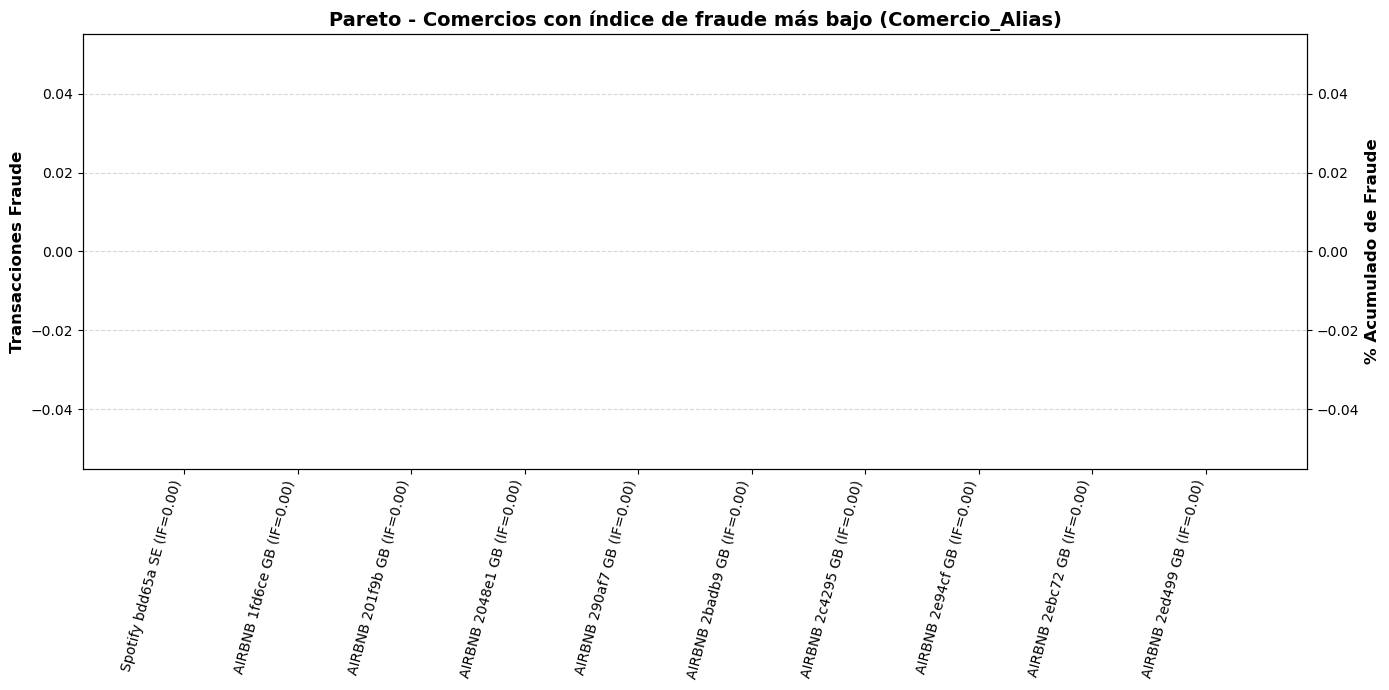

In [91]:
# Campo principal para análisis (cambia aquí según tu necesidad)
CAMPO_PRIMARIO = "Comercio_Alias"

# Filtra y procesa transacciones del canal CNP
df_cnp = df_patrones[df_patrones["canal"] == "CNP"].copy()
df_cnp["Fraude"] = pd.to_numeric(df_cnp["Fraude"], errors="coerce").fillna(0).astype(int)

# Agrupación y métricas por CAMPO_PRIMARIO y trimestre
grp = (
    df_cnp.groupby([CAMPO_PRIMARIO, "trimestre"], as_index=False)
    .agg(TT=("Fraude", "size"), TF=("Fraude", "sum"))
)
grp["IF"] = (grp["TF"] / grp["TT"]).round(4)  # Índice de fraude por periodo y campo

# Pivot para visualización por campo/trimestre
pivot = grp.pivot_table(
    index=CAMPO_PRIMARIO,
    columns="trimestre",
    values=["TT", "TF", "IF"],
    fill_value=0
)
pivot.columns = [f"{col[1]}_{col[0]}" for col in pivot.columns]
pivot = pivot.reset_index()

# Totales globales por CAMPO_PRIMARIO
totales = (
    df_cnp.groupby(CAMPO_PRIMARIO)
    .agg(TT=("Fraude", "size"), TF=("Fraude", "sum"))
    .reset_index()
)
totales["IF"] = (totales["TF"] / totales["TT"]).round(4)
totales = totales.rename(columns={"TT": "TT_TOTAL", "TF": "TF_TOTAL", "IF": "IF_TOTAL"})

# Unión de pivot y totales globales
fraude_final = pivot.merge(totales, on=CAMPO_PRIMARIO, how="left")
fraude_final = fraude_final.fillna(0)
fraude_final = fraude_final.sort_values(by="IF_TOTAL", ascending=False)

# Conteo vectorizado por rangos
bins = [0, 0.01, 0.25, 0.50, 0.75, 0.99, 1.00001]
labels = ["IGUAL 0", "0.01-0.25", "0.25-0.50", "0.50-0.75", "0.75-0.99", "IGUAL 1"]
fraude_final["rango_if"] = pd.cut(fraude_final["IF_TOTAL"], bins=bins, labels=labels, include_lowest=True, right=False)
tabla_rangos = fraude_final["rango_if"].value_counts().reindex(labels).reset_index()
tabla_rangos.columns = [f"Rango IF_TOTAL ({CAMPO_PRIMARIO})", "Cantidad"]

display(tabla_rangos)

# Exporta resultados completos a Excel
ruta_destino = r"C:\Users\xavie\Documents\PROYECTOS\fraud-detection-ml\data\indice_fraude"
os.makedirs(ruta_destino, exist_ok=True)
archivo_export = os.path.join(ruta_destino, f"indice_fraude_{CAMPO_PRIMARIO}.xlsx")
fraude_final.to_excel(archivo_export, index=False)
print(f"✅ Archivo exportado como '{archivo_export}'")

# Visualización PARETO para altos IF
altoriesgo = fraude_final[fraude_final["IF_TOTAL"] > 0.24].sort_values("TF_TOTAL", ascending=False).head(40)
altoriesgo["%Acum"] = altoriesgo["TF_TOTAL"].cumsum() / altoriesgo["TF_TOTAL"].sum() * 100

# Etiquetas customizadas: Campo primario + índice de fraude
etiquetas = [
    f"{v} (IF={f:.2f})"
    for v, f in zip(altoriesgo[CAMPO_PRIMARIO], altoriesgo["IF_TOTAL"])
]

fig, ax1 = plt.subplots(figsize=(14,7))
ax1.bar(etiquetas, altoriesgo["TF_TOTAL"], color="crimson")
ax1.set_ylabel("Transacciones Fraude", fontsize=12, weight="bold")
ax1.set_xticklabels(etiquetas, rotation=75, ha="right")
ax2 = ax1.twinx()
ax2.plot(etiquetas, altoriesgo["%Acum"], color="blue", marker="o", linewidth=2)
ax2.set_ylabel("% Acumulado de Fraude", fontsize=12, weight="bold")
plt.title(f"Pareto - Top 40 {CAMPO_PRIMARIO} con IF_TOTAL > 99%", fontsize=14, weight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# Selecciona los 40 comercios con menor índice de fraude
bajoriesgo = fraude_final.sort_values("IF_TOTAL", ascending=True).head(10)
bajoriesgo["%Acum"] = bajoriesgo["TF_TOTAL"].cumsum() / bajoriesgo["TF_TOTAL"].sum() * 100

# Etiquetas customizadas: campo primario + índice de fraude bajo
etiquetas_bajo = [
    f"{v} (IF={f:.2f})"
    for v, f in zip(bajoriesgo[CAMPO_PRIMARIO], bajoriesgo["IF_TOTAL"])
]

fig, ax1 = plt.subplots(figsize=(14,7))
ax1.bar(etiquetas_bajo, bajoriesgo["TF_TOTAL"], color="mediumseagreen")
ax1.set_ylabel("Transacciones Fraude", fontsize=12, weight="bold")
ax1.set_xticklabels(etiquetas_bajo, rotation=75, ha="right")
ax2 = ax1.twinx()
ax2.plot(etiquetas_bajo, bajoriesgo["%Acum"], color="blue", marker="o", linewidth=2)
ax2.set_ylabel("% Acumulado de Fraude", fontsize=12, weight="bold")
plt.title(f"Pareto - Comercios con índice de fraude más bajo ({CAMPO_PRIMARIO})", fontsize=14, weight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

,Rango IF_TOTAL (DE61_13_Cod_Pais),Cantidad
0,IGUAL 0,48
1,0.01-0.25,35
2,0.25-0.50,4
3,0.50-0.75,0
4,0.75-0.99,1
5,IGUAL 1,1


✅ Archivo exportado como 'C:\Users\xavie\Documents\PROYECTOS\fraud-detection-ml\data\indice_fraude\indice_fraude_DE61_13_Cod_Pais.xlsx'


C:\Users\xavie\AppData\Local\Temp\ipykernel_22352\4060452429.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(etiquetas, rotation=75, ha="right")


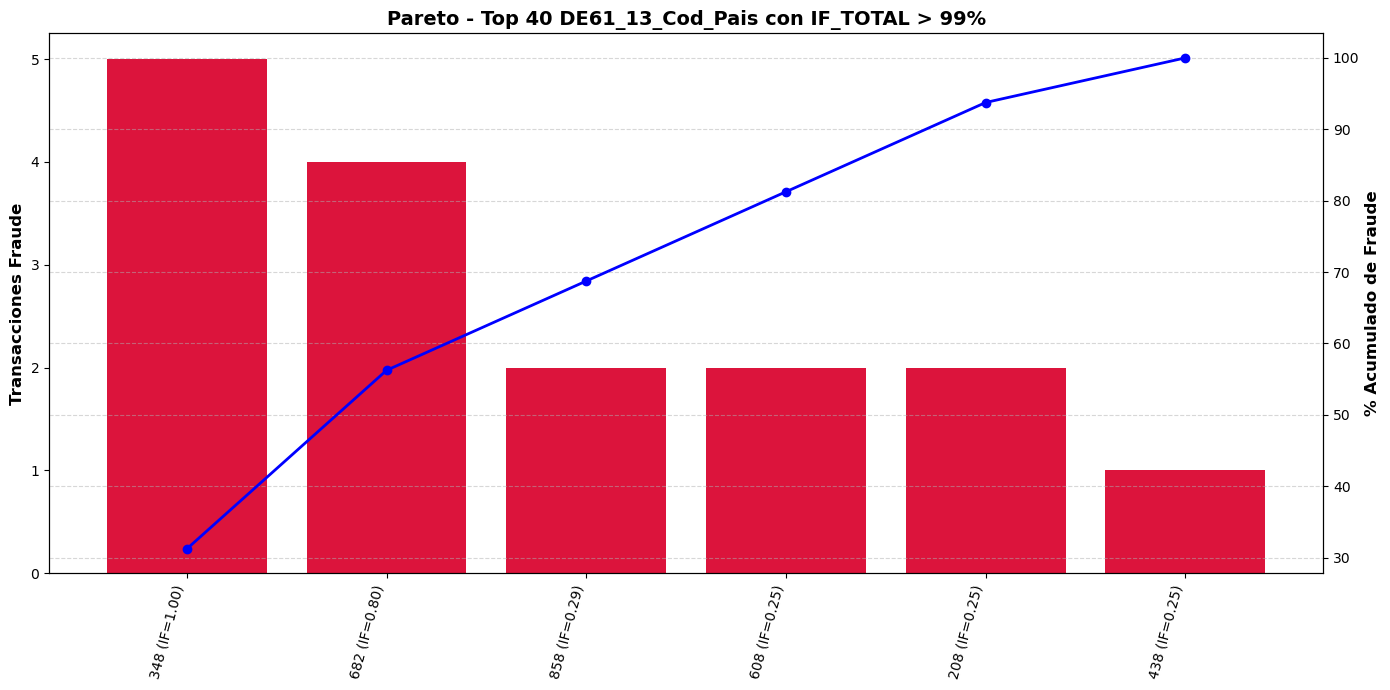

C:\Users\xavie\AppData\Local\Temp\ipykernel_22352\4060452429.py:90: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(etiquetas_bajo, rotation=75, ha="right")


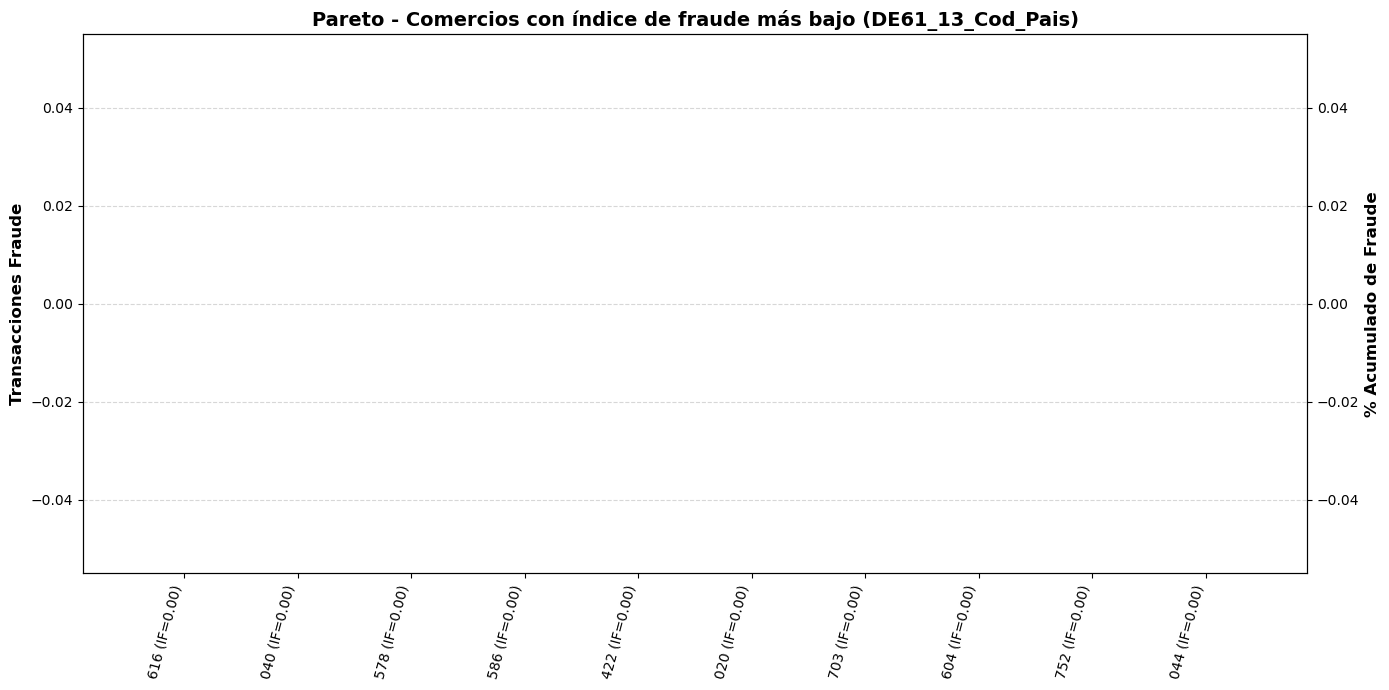

In [90]:
# Campo principal para análisis (cambia aquí según tu necesidad)
CAMPO_PRIMARIO = "DE61_13_Cod_Pais"

# Filtra y procesa transacciones del canal CNP
df_cnp = df_patrones[df_patrones["canal"] == "CNP"].copy()
df_cnp["Fraude"] = pd.to_numeric(df_cnp["Fraude"], errors="coerce").fillna(0).astype(int)

# Agrupación y métricas por CAMPO_PRIMARIO y trimestre
grp = (
    df_cnp.groupby([CAMPO_PRIMARIO, "trimestre"], as_index=False)
    .agg(TT=("Fraude", "size"), TF=("Fraude", "sum"))
)
grp["IF"] = (grp["TF"] / grp["TT"]).round(4)  # Índice de fraude por periodo y campo

# Pivot para visualización por campo/trimestre
pivot = grp.pivot_table(
    index=CAMPO_PRIMARIO,
    columns="trimestre",
    values=["TT", "TF", "IF"],
    fill_value=0
)
pivot.columns = [f"{col[1]}_{col[0]}" for col in pivot.columns]
pivot = pivot.reset_index()

# Totales globales por CAMPO_PRIMARIO
totales = (
    df_cnp.groupby(CAMPO_PRIMARIO)
    .agg(TT=("Fraude", "size"), TF=("Fraude", "sum"))
    .reset_index()
)
totales["IF"] = (totales["TF"] / totales["TT"]).round(4)
totales = totales.rename(columns={"TT": "TT_TOTAL", "TF": "TF_TOTAL", "IF": "IF_TOTAL"})

# Unión de pivot y totales globales
fraude_final = pivot.merge(totales, on=CAMPO_PRIMARIO, how="left")
fraude_final = fraude_final.fillna(0)
fraude_final = fraude_final.sort_values(by="IF_TOTAL", ascending=False)

# Conteo vectorizado por rangos
bins = [0, 0.01, 0.25, 0.50, 0.75, 0.99, 1.00001]
labels = ["IGUAL 0", "0.01-0.25", "0.25-0.50", "0.50-0.75", "0.75-0.99", "IGUAL 1"]
fraude_final["rango_if"] = pd.cut(fraude_final["IF_TOTAL"], bins=bins, labels=labels, include_lowest=True, right=False)
tabla_rangos = fraude_final["rango_if"].value_counts().reindex(labels).reset_index()
tabla_rangos.columns = [f"Rango IF_TOTAL ({CAMPO_PRIMARIO})", "Cantidad"]

display(tabla_rangos)

# Exporta resultados completos a Excel
ruta_destino = r"C:\Users\xavie\Documents\PROYECTOS\fraud-detection-ml\data\indice_fraude"
os.makedirs(ruta_destino, exist_ok=True)
archivo_export = os.path.join(ruta_destino, f"indice_fraude_{CAMPO_PRIMARIO}.xlsx")
fraude_final.to_excel(archivo_export, index=False)
print(f"✅ Archivo exportado como '{archivo_export}'")

# Visualización PARETO para altos IF
altoriesgo = fraude_final[fraude_final["IF_TOTAL"] > 0.24].sort_values("TF_TOTAL", ascending=False).head(40)
altoriesgo["%Acum"] = altoriesgo["TF_TOTAL"].cumsum() / altoriesgo["TF_TOTAL"].sum() * 100

# Etiquetas customizadas: Campo primario + índice de fraude
etiquetas = [
    f"{v} (IF={f:.2f})"
    for v, f in zip(altoriesgo[CAMPO_PRIMARIO], altoriesgo["IF_TOTAL"])
]

fig, ax1 = plt.subplots(figsize=(14,7))
ax1.bar(etiquetas, altoriesgo["TF_TOTAL"], color="crimson")
ax1.set_ylabel("Transacciones Fraude", fontsize=12, weight="bold")
ax1.set_xticklabels(etiquetas, rotation=75, ha="right")
ax2 = ax1.twinx()
ax2.plot(etiquetas, altoriesgo["%Acum"], color="blue", marker="o", linewidth=2)
ax2.set_ylabel("% Acumulado de Fraude", fontsize=12, weight="bold")
plt.title(f"Pareto - Top 40 {CAMPO_PRIMARIO} con IF_TOTAL > 99%", fontsize=14, weight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# Selecciona los 40 comercios con menor índice de fraude
bajoriesgo = fraude_final.sort_values("IF_TOTAL", ascending=True).head(10)
bajoriesgo["%Acum"] = bajoriesgo["TF_TOTAL"].cumsum() / bajoriesgo["TF_TOTAL"].sum() * 100

# Etiquetas customizadas: campo primario + índice de fraude bajo
etiquetas_bajo = [
    f"{v} (IF={f:.2f})"
    for v, f in zip(bajoriesgo[CAMPO_PRIMARIO], bajoriesgo["IF_TOTAL"])
]

fig, ax1 = plt.subplots(figsize=(14,7))
ax1.bar(etiquetas_bajo, bajoriesgo["TF_TOTAL"], color="mediumseagreen")
ax1.set_ylabel("Transacciones Fraude", fontsize=12, weight="bold")
ax1.set_xticklabels(etiquetas_bajo, rotation=75, ha="right")
ax2 = ax1.twinx()
ax2.plot(etiquetas_bajo, bajoriesgo["%Acum"], color="blue", marker="o", linewidth=2)
ax2.set_ylabel("% Acumulado de Fraude", fontsize=12, weight="bold")
plt.title(f"Pareto - Comercios con índice de fraude más bajo ({CAMPO_PRIMARIO})", fontsize=14, weight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

,Rango IF_TOTAL (DE18_MCC),Cantidad
0,IGUAL 0,146
1,0.01-0.25,88
2,0.25-0.50,9
3,0.50-0.75,8
4,0.75-0.99,3
5,IGUAL 1,5


✅ Archivo exportado como 'C:\Users\xavie\Documents\PROYECTOS\fraud-detection-ml\data\indice_fraude\indice_fraude_DE18_MCC.xlsx'


C:\Users\xavie\AppData\Local\Temp\ipykernel_22352\2665543810.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(etiquetas, rotation=75, ha="right")


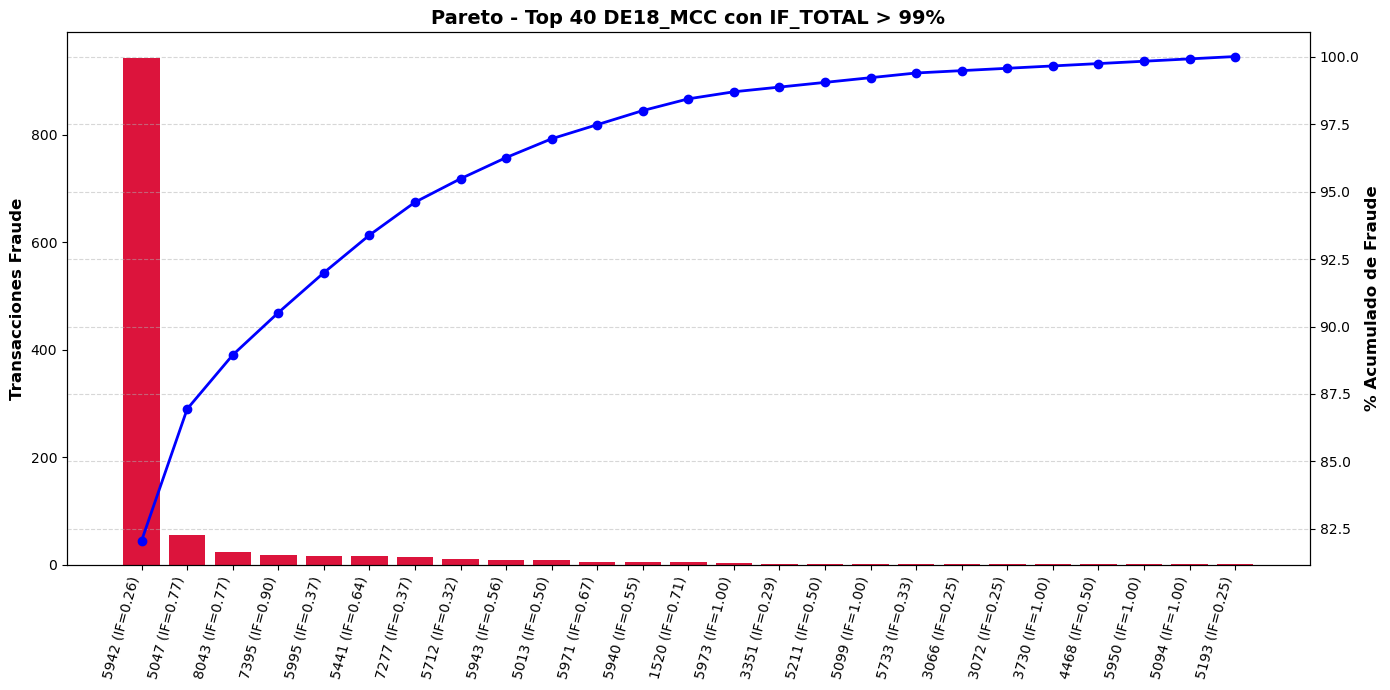

C:\Users\xavie\AppData\Local\Temp\ipykernel_22352\2665543810.py:90: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(etiquetas_bajo, rotation=75, ha="right")


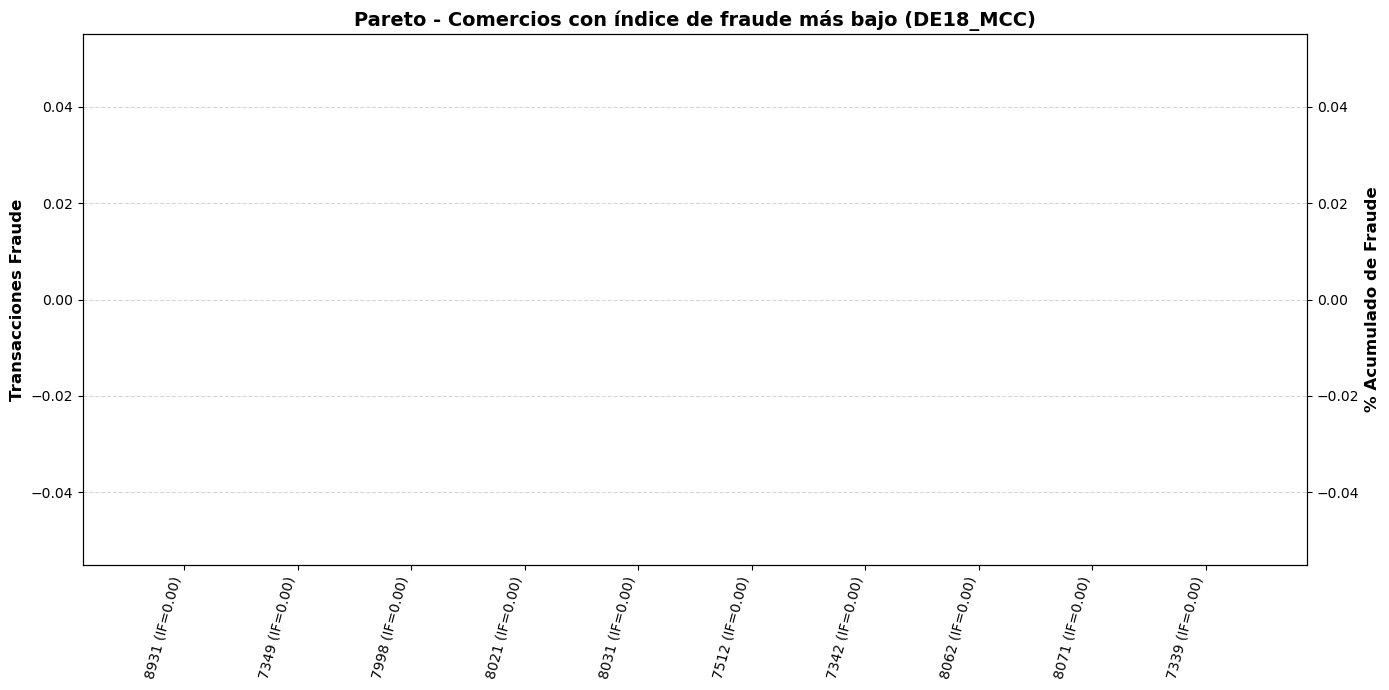

In [92]:
# Campo principal para análisis (cambia aquí según tu necesidad)
CAMPO_PRIMARIO = "DE18_MCC"

# Filtra y procesa transacciones del canal CNP
df_cnp = df_patrones[df_patrones["canal"] == "CNP"].copy()
df_cnp["Fraude"] = pd.to_numeric(df_cnp["Fraude"], errors="coerce").fillna(0).astype(int)

# Agrupación y métricas por CAMPO_PRIMARIO y trimestre
grp = (
    df_cnp.groupby([CAMPO_PRIMARIO, "trimestre"], as_index=False)
    .agg(TT=("Fraude", "size"), TF=("Fraude", "sum"))
)
grp["IF"] = (grp["TF"] / grp["TT"]).round(4)  # Índice de fraude por periodo y campo

# Pivot para visualización por campo/trimestre
pivot = grp.pivot_table(
    index=CAMPO_PRIMARIO,
    columns="trimestre",
    values=["TT", "TF", "IF"],
    fill_value=0
)
pivot.columns = [f"{col[1]}_{col[0]}" for col in pivot.columns]
pivot = pivot.reset_index()

# Totales globales por CAMPO_PRIMARIO
totales = (
    df_cnp.groupby(CAMPO_PRIMARIO)
    .agg(TT=("Fraude", "size"), TF=("Fraude", "sum"))
    .reset_index()
)
totales["IF"] = (totales["TF"] / totales["TT"]).round(4)
totales = totales.rename(columns={"TT": "TT_TOTAL", "TF": "TF_TOTAL", "IF": "IF_TOTAL"})

# Unión de pivot y totales globales
fraude_final = pivot.merge(totales, on=CAMPO_PRIMARIO, how="left")
fraude_final = fraude_final.fillna(0)
fraude_final = fraude_final.sort_values(by="IF_TOTAL", ascending=False)

# Conteo vectorizado por rangos
bins = [0, 0.01, 0.25, 0.50, 0.75, 0.99, 1.00001]
labels = ["IGUAL 0", "0.01-0.25", "0.25-0.50", "0.50-0.75", "0.75-0.99", "IGUAL 1"]
fraude_final["rango_if"] = pd.cut(fraude_final["IF_TOTAL"], bins=bins, labels=labels, include_lowest=True, right=False)
tabla_rangos = fraude_final["rango_if"].value_counts().reindex(labels).reset_index()
tabla_rangos.columns = [f"Rango IF_TOTAL ({CAMPO_PRIMARIO})", "Cantidad"]

display(tabla_rangos)

# Exporta resultados completos a Excel
ruta_destino = r"C:\Users\xavie\Documents\PROYECTOS\fraud-detection-ml\data\indice_fraude"
os.makedirs(ruta_destino, exist_ok=True)
archivo_export = os.path.join(ruta_destino, f"indice_fraude_{CAMPO_PRIMARIO}.xlsx")
fraude_final.to_excel(archivo_export, index=False)
print(f"✅ Archivo exportado como '{archivo_export}'")

# Visualización PARETO para altos IF
altoriesgo = fraude_final[fraude_final["IF_TOTAL"] > 0.24].sort_values("TF_TOTAL", ascending=False).head(40)
altoriesgo["%Acum"] = altoriesgo["TF_TOTAL"].cumsum() / altoriesgo["TF_TOTAL"].sum() * 100

# Etiquetas customizadas: Campo primario + índice de fraude
etiquetas = [
    f"{v} (IF={f:.2f})"
    for v, f in zip(altoriesgo[CAMPO_PRIMARIO], altoriesgo["IF_TOTAL"])
]

fig, ax1 = plt.subplots(figsize=(14,7))
ax1.bar(etiquetas, altoriesgo["TF_TOTAL"], color="crimson")
ax1.set_ylabel("Transacciones Fraude", fontsize=12, weight="bold")
ax1.set_xticklabels(etiquetas, rotation=75, ha="right")
ax2 = ax1.twinx()
ax2.plot(etiquetas, altoriesgo["%Acum"], color="blue", marker="o", linewidth=2)
ax2.set_ylabel("% Acumulado de Fraude", fontsize=12, weight="bold")
plt.title(f"Pareto - Top 40 {CAMPO_PRIMARIO} con IF_TOTAL > 99%", fontsize=14, weight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# Selecciona los 40 comercios con menor índice de fraude
bajoriesgo = fraude_final.sort_values("IF_TOTAL", ascending=True).head(10)
bajoriesgo["%Acum"] = bajoriesgo["TF_TOTAL"].cumsum() / bajoriesgo["TF_TOTAL"].sum() * 100

# Etiquetas customizadas: campo primario + índice de fraude bajo
etiquetas_bajo = [
    f"{v} (IF={f:.2f})"
    for v, f in zip(bajoriesgo[CAMPO_PRIMARIO], bajoriesgo["IF_TOTAL"])
]

fig, ax1 = plt.subplots(figsize=(14,7))
ax1.bar(etiquetas_bajo, bajoriesgo["TF_TOTAL"], color="mediumseagreen")
ax1.set_ylabel("Transacciones Fraude", fontsize=12, weight="bold")
ax1.set_xticklabels(etiquetas_bajo, rotation=75, ha="right")
ax2 = ax1.twinx()
ax2.plot(etiquetas_bajo, bajoriesgo["%Acum"], color="blue", marker="o", linewidth=2)
ax2.set_ylabel("% Acumulado de Fraude", fontsize=12, weight="bold")
plt.title(f"Pareto - Comercios con índice de fraude más bajo ({CAMPO_PRIMARIO})", fontsize=14, weight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

,Rango IF_TOTAL (DE32_Cod_Adquiriente),Cantidad
0,IGUAL 0,428
1,0.01-0.25,111
2,0.25-0.50,19
3,0.50-0.75,9
4,0.75-0.99,5
5,IGUAL 1,13


✅ Archivo exportado como 'C:\Users\xavie\Documents\PROYECTOS\fraud-detection-ml\data\indice_fraude\indice_fraude_DE32_Cod_Adquiriente.xlsx'


C:\Users\xavie\AppData\Local\Temp\ipykernel_22352\2484051764.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(etiquetas, rotation=75, ha="right")


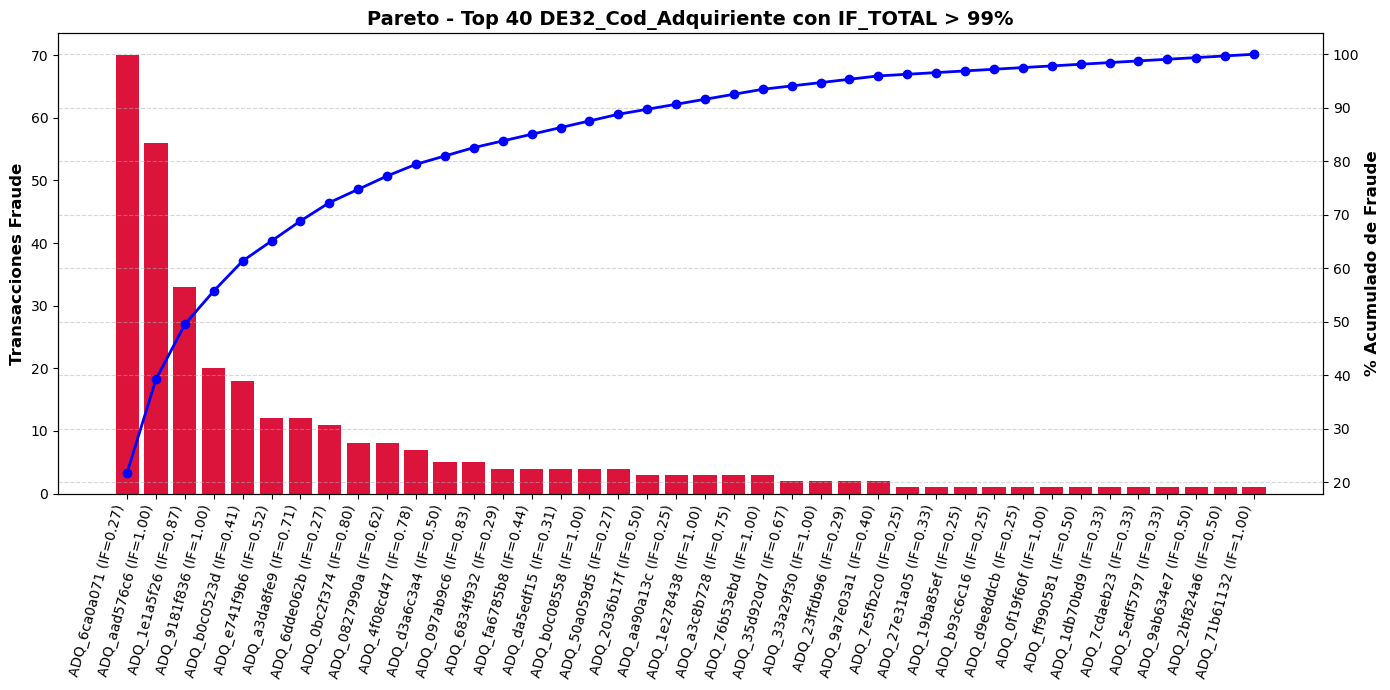

C:\Users\xavie\AppData\Local\Temp\ipykernel_22352\2484051764.py:90: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(etiquetas_bajo, rotation=75, ha="right")


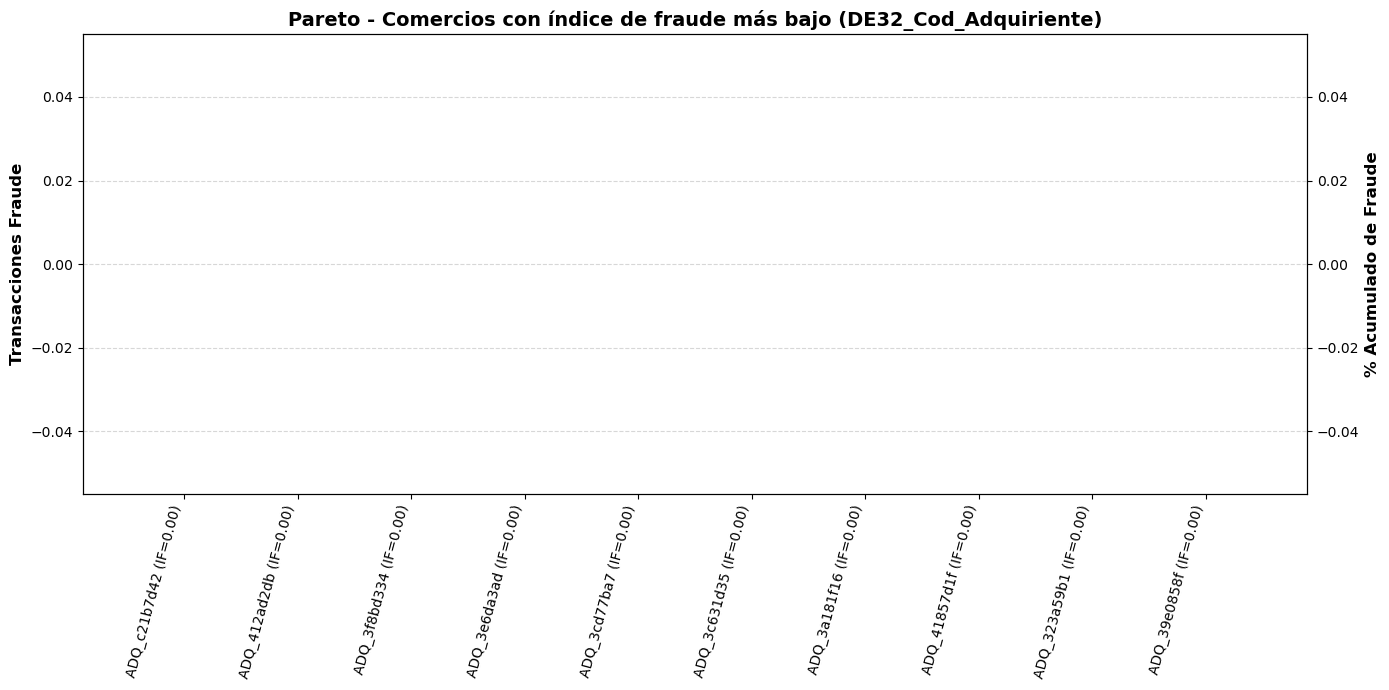

In [93]:
# Campo principal para análisis (cambia aquí según tu necesidad)
CAMPO_PRIMARIO = "DE32_Cod_Adquiriente"

# Filtra y procesa transacciones del canal CNP
df_cnp = df_patrones[df_patrones["canal"] == "CNP"].copy()
df_cnp["Fraude"] = pd.to_numeric(df_cnp["Fraude"], errors="coerce").fillna(0).astype(int)

# Agrupación y métricas por CAMPO_PRIMARIO y trimestre
grp = (
    df_cnp.groupby([CAMPO_PRIMARIO, "trimestre"], as_index=False)
    .agg(TT=("Fraude", "size"), TF=("Fraude", "sum"))
)
grp["IF"] = (grp["TF"] / grp["TT"]).round(4)  # Índice de fraude por periodo y campo

# Pivot para visualización por campo/trimestre
pivot = grp.pivot_table(
    index=CAMPO_PRIMARIO,
    columns="trimestre",
    values=["TT", "TF", "IF"],
    fill_value=0
)
pivot.columns = [f"{col[1]}_{col[0]}" for col in pivot.columns]
pivot = pivot.reset_index()

# Totales globales por CAMPO_PRIMARIO
totales = (
    df_cnp.groupby(CAMPO_PRIMARIO)
    .agg(TT=("Fraude", "size"), TF=("Fraude", "sum"))
    .reset_index()
)
totales["IF"] = (totales["TF"] / totales["TT"]).round(4)
totales = totales.rename(columns={"TT": "TT_TOTAL", "TF": "TF_TOTAL", "IF": "IF_TOTAL"})

# Unión de pivot y totales globales
fraude_final = pivot.merge(totales, on=CAMPO_PRIMARIO, how="left")
fraude_final = fraude_final.fillna(0)
fraude_final = fraude_final.sort_values(by="IF_TOTAL", ascending=False)

# Conteo vectorizado por rangos
bins = [0, 0.01, 0.25, 0.50, 0.75, 0.99, 1.00001]
labels = ["IGUAL 0", "0.01-0.25", "0.25-0.50", "0.50-0.75", "0.75-0.99", "IGUAL 1"]
fraude_final["rango_if"] = pd.cut(fraude_final["IF_TOTAL"], bins=bins, labels=labels, include_lowest=True, right=False)
tabla_rangos = fraude_final["rango_if"].value_counts().reindex(labels).reset_index()
tabla_rangos.columns = [f"Rango IF_TOTAL ({CAMPO_PRIMARIO})", "Cantidad"]

display(tabla_rangos)

# Exporta resultados completos a Excel
ruta_destino = r"C:\Users\xavie\Documents\PROYECTOS\fraud-detection-ml\data\indice_fraude"
os.makedirs(ruta_destino, exist_ok=True)
archivo_export = os.path.join(ruta_destino, f"indice_fraude_{CAMPO_PRIMARIO}.xlsx")
fraude_final.to_excel(archivo_export, index=False)
print(f"✅ Archivo exportado como '{archivo_export}'")

# Visualización PARETO para altos IF
altoriesgo = fraude_final[fraude_final["IF_TOTAL"] > 0.24].sort_values("TF_TOTAL", ascending=False).head(40)
altoriesgo["%Acum"] = altoriesgo["TF_TOTAL"].cumsum() / altoriesgo["TF_TOTAL"].sum() * 100

# Etiquetas customizadas: Campo primario + índice de fraude
etiquetas = [
    f"{v} (IF={f:.2f})"
    for v, f in zip(altoriesgo[CAMPO_PRIMARIO], altoriesgo["IF_TOTAL"])
]

fig, ax1 = plt.subplots(figsize=(14,7))
ax1.bar(etiquetas, altoriesgo["TF_TOTAL"], color="crimson")
ax1.set_ylabel("Transacciones Fraude", fontsize=12, weight="bold")
ax1.set_xticklabels(etiquetas, rotation=75, ha="right")
ax2 = ax1.twinx()
ax2.plot(etiquetas, altoriesgo["%Acum"], color="blue", marker="o", linewidth=2)
ax2.set_ylabel("% Acumulado de Fraude", fontsize=12, weight="bold")
plt.title(f"Pareto - Top 40 {CAMPO_PRIMARIO} con IF_TOTAL > 99%", fontsize=14, weight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# Selecciona los 40 comercios con menor índice de fraude
bajoriesgo = fraude_final.sort_values("IF_TOTAL", ascending=True).head(10)
bajoriesgo["%Acum"] = bajoriesgo["TF_TOTAL"].cumsum() / bajoriesgo["TF_TOTAL"].sum() * 100

# Etiquetas customizadas: campo primario + índice de fraude bajo
etiquetas_bajo = [
    f"{v} (IF={f:.2f})"
    for v, f in zip(bajoriesgo[CAMPO_PRIMARIO], bajoriesgo["IF_TOTAL"])
]

fig, ax1 = plt.subplots(figsize=(14,7))
ax1.bar(etiquetas_bajo, bajoriesgo["TF_TOTAL"], color="mediumseagreen")
ax1.set_ylabel("Transacciones Fraude", fontsize=12, weight="bold")
ax1.set_xticklabels(etiquetas_bajo, rotation=75, ha="right")
ax2 = ax1.twinx()
ax2.plot(etiquetas_bajo, bajoriesgo["%Acum"], color="blue", marker="o", linewidth=2)
ax2.set_ylabel("% Acumulado de Fraude", fontsize=12, weight="bold")
plt.title(f"Pareto - Comercios con índice de fraude más bajo ({CAMPO_PRIMARIO})", fontsize=14, weight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()